In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from keys import API_KEY

I have to take this part to comment because I need to run all without issues and I already have the data.

In [3]:
# def get_energy_data_batches():
#     url = "https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/"

#     start_date = "2024-01-01T00"
#     end_date = "2024-12-31T23"

#     len_of_request = 5000
#     offset = 0
#     total_records = 0

#     params = {
#         "api_key": API_KEY,
#         "frequency": "hourly",
#         "data[0]": "value",
#         "start": start_date,
#         "end": end_date,
#         "sort[0][column]": "period",
#         "sort[0][direction]": "asc",
#         "length": len_of_request
#     }

#     all_data = []

#     print(f"Requesting monthly data from {start_date} to {end_date}...")
#     print("Starting paginated data collection....")
#     while True:
#         params_copy = params.copy()
#         params_copy['offset'] = offset
#         print(f"Requesting {offset} to {len_of_request + offset - 1} rows...")
#         response = requests.get(url, params=params_copy)
#         if response.status_code != 200:
#             print("Could not fetch the data from the source")
#             print("Status code:", response.status_code)
#             print("Response text:", response.text) 
#             break
#         data = response.json()
#         if 'response' in data and 'data' in data['response']:
#             batch = pd.DataFrame(data['response']['data'])
#             print(f"Retrieved {len(batch)} records.")
#             if batch.empty:
#                 print("No data returned")
#                 break
#             all_data.append(batch)
#             batch_size = len(batch)
#             total_records += batch_size
#             print(f"Retrieved {batch_size} data and data amount totalled to {total_records}")
#             if batch_size < len_of_request:
#                 print(f"Last batch is collected. Ending pagination.")
#                 break
#             offset += batch_size
#         else:
#             print("No data returned for this batch.")
#             break
#     if batch.empty:
#         print("No data was collected")
#         return None

#     energy_df = pd.concat(all_data, ignore_index=True)
#     print(f"sucessfully collected {len(energy_df)} records")
#     energy_df['period'] = pd.to_datetime(energy_df['period'])
#     energy_df['value'] = pd.to_numeric(energy_df['value'], errors='coerce')

#     return energy_df

# energy_df = get_energy_data_batches()

# if energy_df is not None and not energy_df.empty:
#     print("\nData collection successful!")
#     print(f"Dataset shape: {energy_df.shape}")
# else:
#     print("Data collection failed.")

In [4]:
## it is smarter to save the whole data after this api call since it is extremely long and takes around one and half hour to load
#energy_df.to_csv("energy_data_new.csv", index=False)

In [5]:
energy_df = pd.read_csv("energy_data_new.csv", parse_dates=['period'])

In [6]:
energy_df

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,2162.0,megawatthours
1,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",NG,Natural Gas,984.0,megawatthours
2,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",WND,Wind,244.0,megawatthours
3,2024-01-01,AVA,Avista Corporation,NG,Natural Gas,378.0,megawatthours
4,2024-01-01,AVA,Avista Corporation,OTH,Other,129.0,megawatthours
...,...,...,...,...,...,...,...
3427509,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WAT,Hydro,0.0,megawatthours
3427510,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WND,Wind,81.0,megawatthours
3427511,2024-12-31,WAUW,Western Area Power Administration - Upper Grea...,WAT,Hydro,69.0,megawatthours
3427512,2024-12-31,WWA,"NaturEner Wind Watch, LLC",WND,Wind,0.0,megawatthours


In [7]:
if energy_df is not None and not energy_df.empty:
    print("Hour distribution in energy_df AFTER dropna():")
    print(energy_df['period'].dt.hour.value_counts().sort_index())
else:
    print("energy_df is empty or None after dropna().")

Hour distribution in energy_df AFTER dropna():
period
0     143256
1     142842
2     142756
3     142763
4     142735
5     142683
6     142765
7     142771
8     142835
9     142880
10    142882
11    142894
12    142901
13    142891
14    142810
15    142795
16    142737
17    142726
18    142716
19    142762
20    142769
21    142759
22    142784
23    142802
Name: count, dtype: int64


In [8]:
### to check if the data is normally fetched (and yes it is fetched correctly)
energy_df.tail()

,period,respondent,respondent-name,fueltype,type-name,value,value-units
3427509,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WAT,Hydro,0.0,megawatthours
3427510,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WND,Wind,81.0,megawatthours
3427511,2024-12-31,WAUW,Western Area Power Administration - Upper Grea...,WAT,Hydro,69.0,megawatthours
3427512,2024-12-31,WWA,"NaturEner Wind Watch, LLC",WND,Wind,0.0,megawatthours
3427513,2024-12-31,YAD,"Alcoa Power Generating, Inc. - Yadkin Division",WAT,Hydro,123.0,megawatthours


In [9]:
energy_df.count()
val_count = energy_df['value'].count()
norm_count = energy_df['period'].count()
missing_vals = norm_count - val_count
missing_vals

3005

In [10]:
## only missing vals are the value in the data.
## this is the only data cleaning step that will be done here
val_mean = energy_df["value"].mean()
energy_df['value'] = energy_df['value'].fillna(val_mean)
energy_df.count()

period             3427514
respondent         3427514
respondent-name    3427514
fueltype           3427514
type-name          3427514
value              3427514
value-units        3427514
dtype: int64

In [11]:
total_electric_used = energy_df['value'].sum()
total_electric_used

12483268161.855352

In [12]:
energy_df["hour"] = energy_df["period"].dt.hour

In [13]:
print("Distribution of hours in the original data:")
print(energy_df['period'].dt.hour.value_counts().sort_index())

print("\nSample rows with period values:")
sample_rows = energy_df.sample(min(10, len(energy_df)))
print(sample_rows[['period', 'fueltype', 'value']])

print("\nUnique dates in the dataset:")
print(energy_df['period'].dt.date.value_counts().head())

print("\nChecking your API call parameters:")
print("First few period_test tuples:")

Distribution of hours in the original data:
period
0     143256
1     142842
2     142756
3     142763
4     142735
5     142683
6     142765
7     142771
8     142835
9     142880
10    142882
11    142894
12    142901
13    142891
14    142810
15    142795
16    142737
17    142726
18    142716
19    142762
20    142769
21    142759
22    142784
23    142802
Name: count, dtype: int64

Sample rows with period values:
                     period fueltype   value
333657  2024-02-05 14:00:00      SUN     4.0
3060256 2024-11-23 10:00:00      COL  1747.0
2411936 2024-09-15 14:00:00      SUN   891.0
860730  2024-04-01 22:00:00      OTH  -139.0
672449  2024-03-12 19:00:00      OTH   361.0
1912861 2024-07-24 00:00:00      COL  9456.0
2875349 2024-11-04 08:00:00      WAT   247.0
883707  2024-04-04 09:00:00      WND     5.0
2829430 2024-10-30 10:00:00      COL  8298.0
1568089 2024-06-16 18:00:00       NG  3740.0

Unique dates in the dataset:
period
2024-12-30    9889
2024-12-29    9835
2024-12-

In [14]:
## aggregating data into hourly generation throughout the day (all fuel types combined)
total_hourly_generation = energy_df.groupby('hour')['value'].sum().reset_index()

total_hourly_generation.rename(columns={'value': 'total_generation_for_hour'}, inplace=True)

total_hourly_generation

,hour,total_generation_for_hour
0,0,5.792936e+08
1,1,5.723675e+08
2,2,5.606190e+08
3,3,5.421305e+08
4,4,5.193189e+08
5,5,4.976917e+08
6,6,4.777214e+08
7,7,4.613150e+08
8,8,4.502391e+08
9,9,4.460404e+08


In [15]:
## Aggregating data into hourly generation throughout the day by the fuel type
data = energy_df.groupby(["hour", "fueltype"])["value"].sum()
data_table = data.unstack(fill_value=0)
data_table.head(100)

fueltype,BAT,COL,GEO,NG,NUC,OIL,OTH,PS,SNB,SUN,UES,UNK,WAT,WND
hour,,,,,,,,,,,,,,
0,366618.0,9.598552e+07,207.0,2.505868e+08,9.783960e+07,1.116723e+06,7.352985e+06,109317.0,546.0,3.088822e+07,-24360.0,0.0,4.093138e+07,5.414009e+07
1,319446.0,9.692966e+07,102.0,2.511909e+08,9.758205e+07,1.011683e+06,9.167407e+06,80535.0,3102.0,1.911531e+07,-21756.0,0.0,4.088594e+07,5.610309e+07
2,205896.0,9.546084e+07,105.0,2.467816e+08,9.755817e+07,8.996099e+05,1.083702e+07,37878.0,2097.0,1.011857e+07,-28569.0,0.0,3.953194e+07,5.921381e+07
3,170112.0,9.175203e+07,102.0,2.358746e+08,9.753125e+07,7.416718e+05,1.234054e+07,30570.0,1059.0,4.090970e+06,-41367.0,0.0,3.716574e+07,6.247330e+07
4,131025.0,8.667153e+07,90.0,2.218288e+08,9.749761e+07,5.174148e+05,1.294128e+07,29007.0,180.0,1.082597e+06,-54747.0,0.0,3.420998e+07,6.446409e+07
5,104115.0,8.134103e+07,105.0,2.099293e+08,9.742920e+07,4.763048e+05,1.169320e+07,27117.0,57.0,5.099638e+05,-59985.0,0.0,3.122872e+07,6.501250e+07
6,61173.0,7.710612e+07,105.0,1.990149e+08,9.755419e+07,4.544157e+05,1.034944e+07,3627.0,99.0,3.514088e+05,-76806.0,0.0,2.813598e+07,6.476670e+07
7,37626.0,7.366244e+07,108.0,1.916504e+08,9.753955e+07,4.443157e+05,8.555961e+06,2790.0,-6.0,2.274708e+05,-83385.0,0.0,2.541574e+07,6.386202e+07
8,24387.0,7.158906e+07,108.0,1.871344e+08,9.754524e+07,4.547658e+05,7.087029e+06,2460.0,-48.0,1.733838e+05,-93981.0,0.0,2.356255e+07,6.275975e+07


fueltype            BAT           COL         GEO            NG           NUC  \
count         24.000000  2.400000e+01   24.000000  2.400000e+01  2.400000e+01   
mean       88011.250000  8.397289e+07  175.250000  2.167361e+08  9.759211e+07   
std        97842.079771  8.062087e+06   52.492857  2.027497e+07  1.021292e+05   
min        12951.000000  7.089507e+07   90.000000  1.863062e+08  9.742920e+07   
25%        21262.500000  7.764439e+07  107.250000  2.033594e+08  9.753117e+07   
50%        38908.500000  8.439181e+07  207.000000  2.117583e+08  9.755618e+07   
75%       132250.500000  8.966501e+07  216.000000  2.325821e+08  9.766267e+07   
max       366618.000000  9.692966e+07  219.000000  2.511909e+08  9.783960e+07   

fueltype           OIL           OTH            PS          SNB           SUN  \
count     2.400000e+01  2.400000e+01      24.00000    24.000000  2.400000e+01   
mean      7.705402e+05  7.593129e+06   36911.75000   768.500000  2.566874e+07   
std       2.501642e+05  2.5

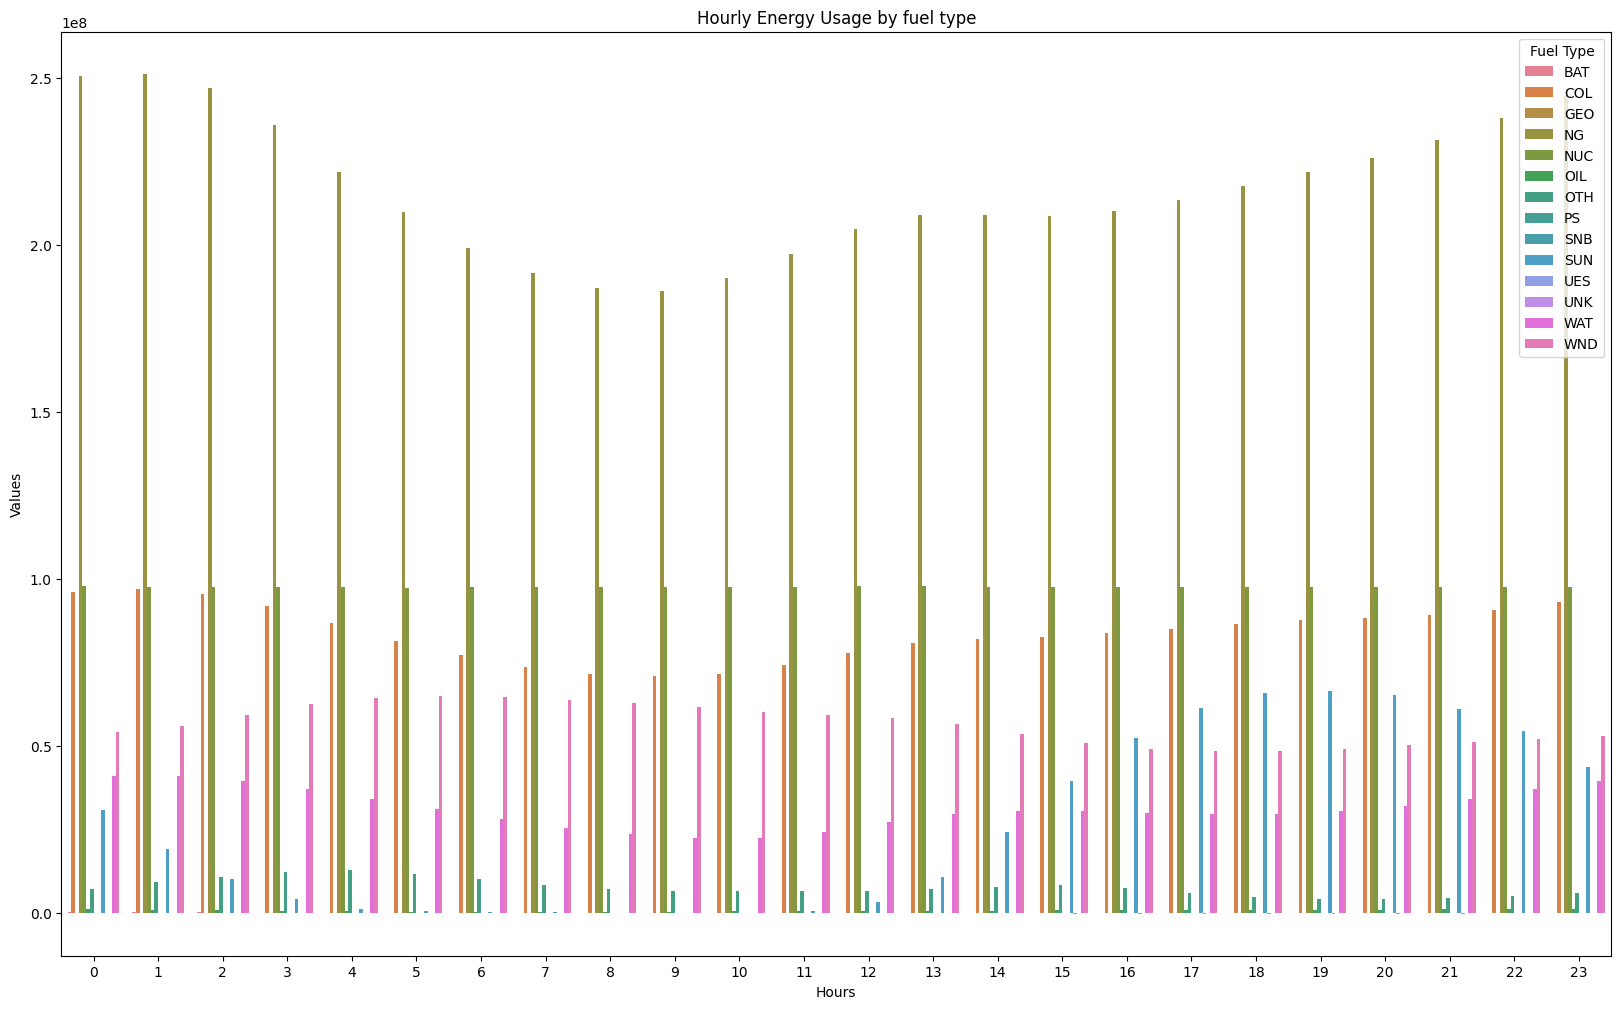

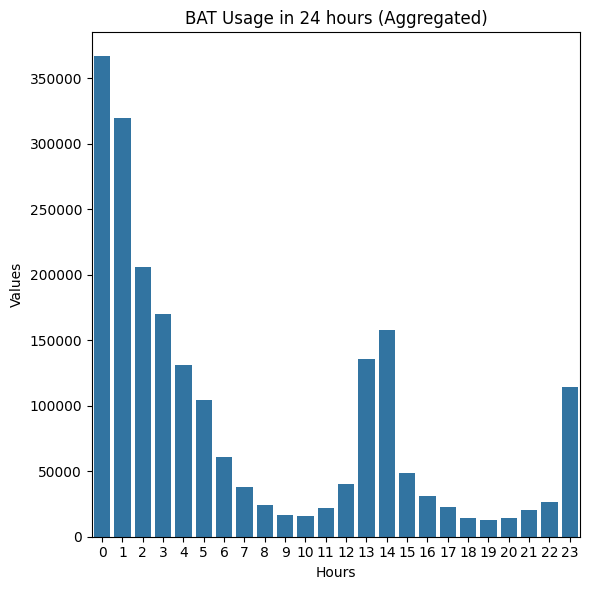

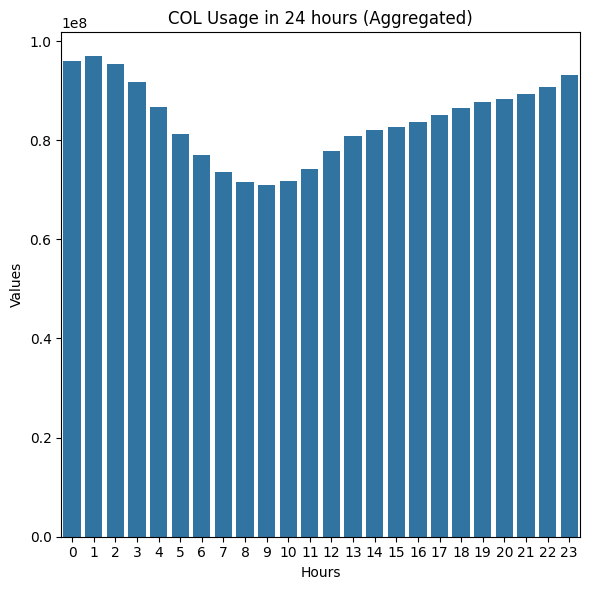

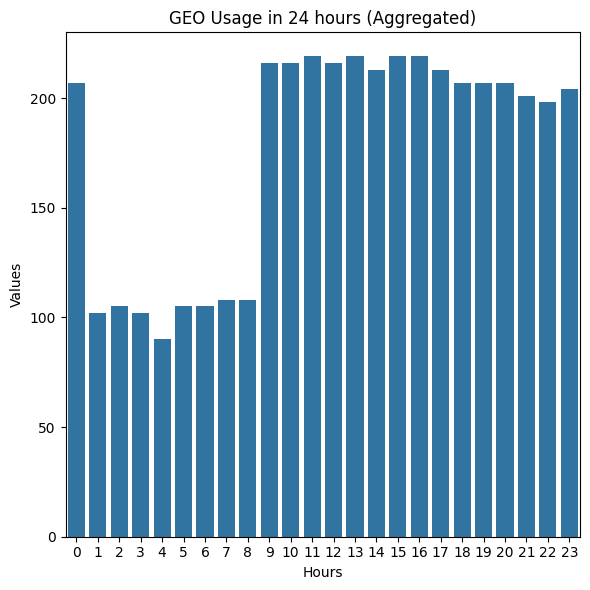

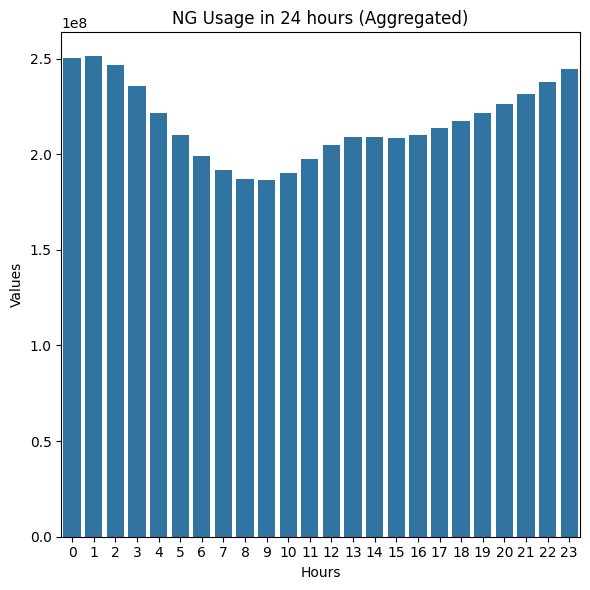

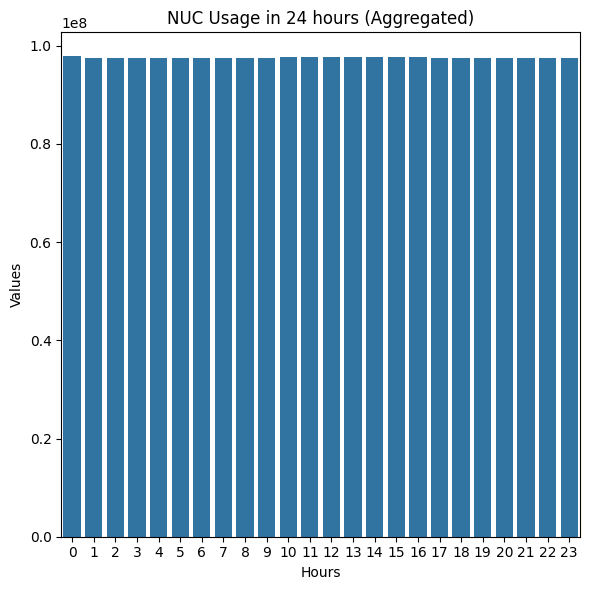

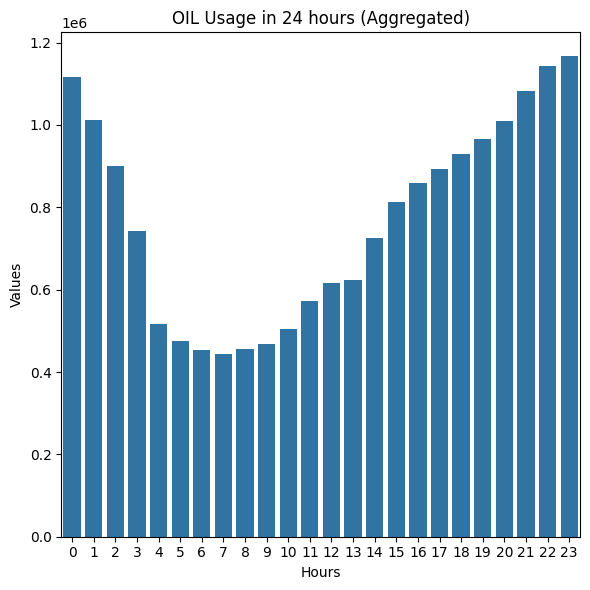

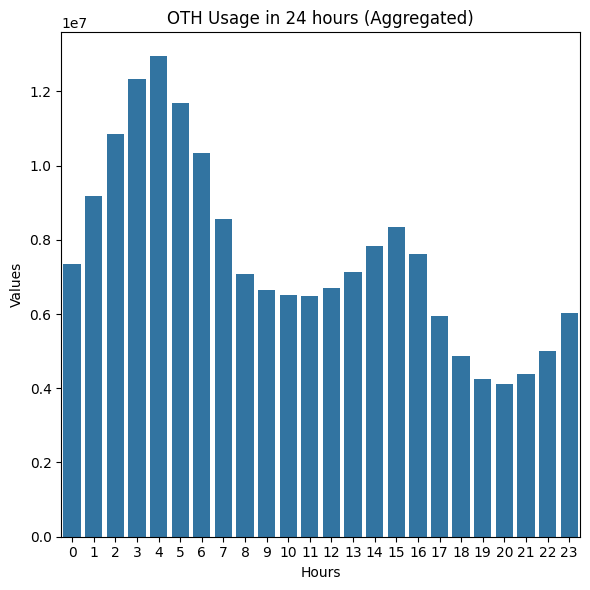

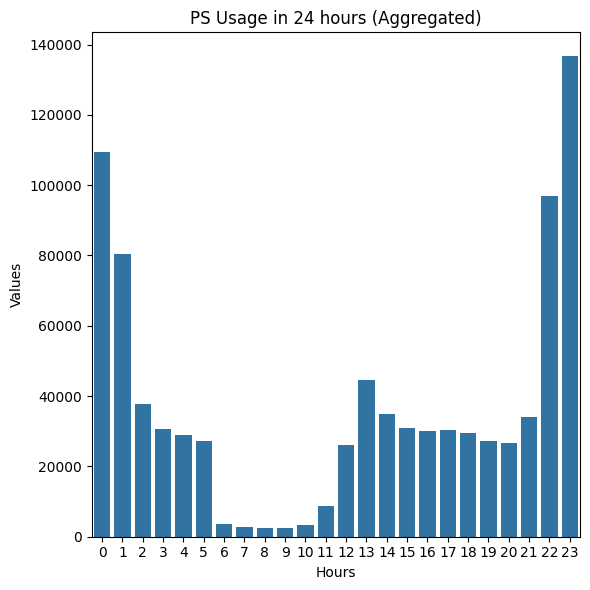

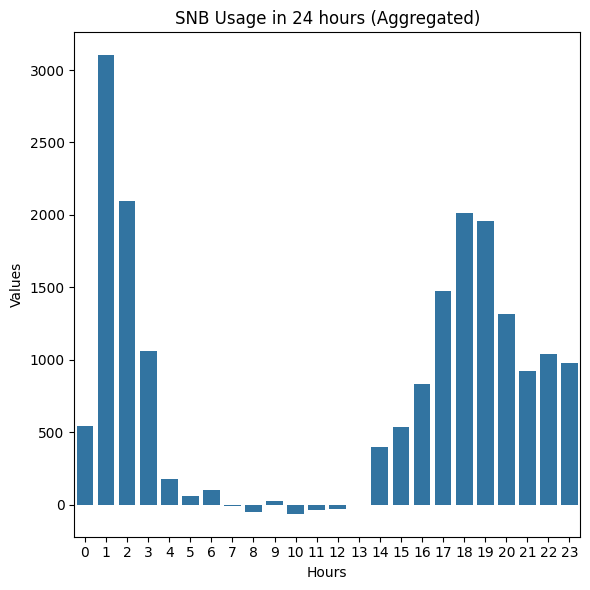

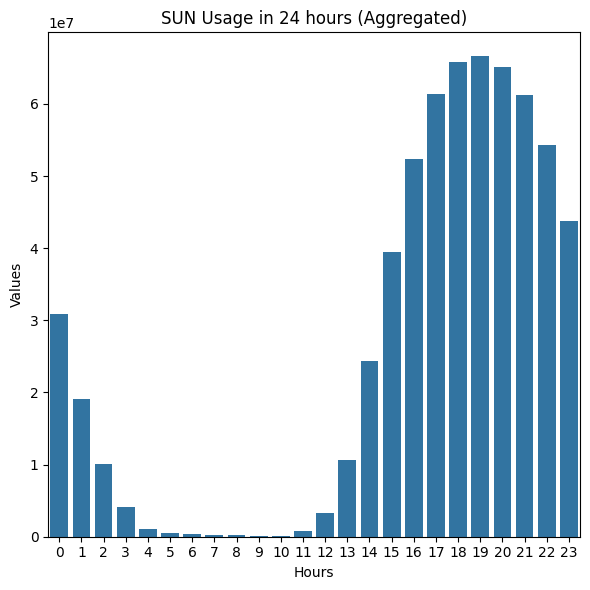

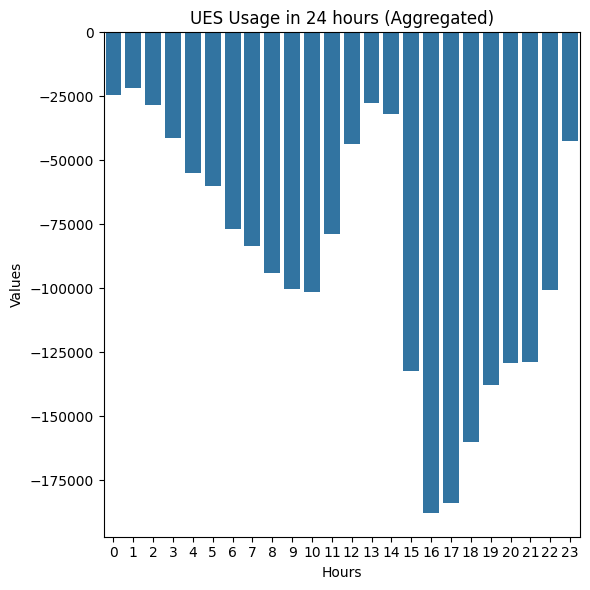

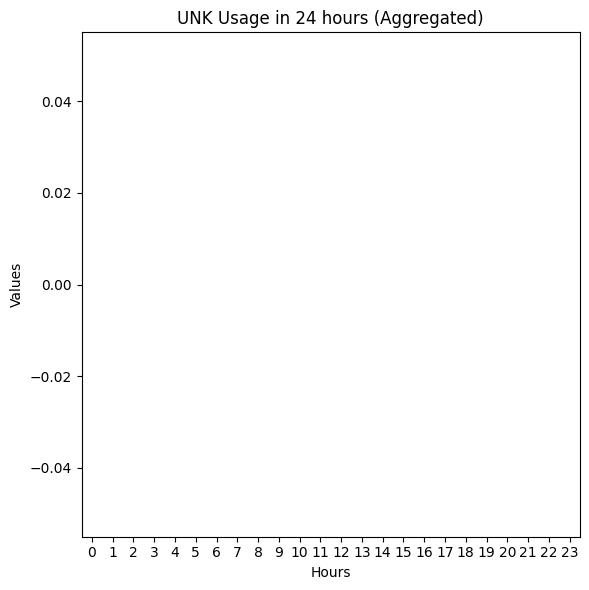

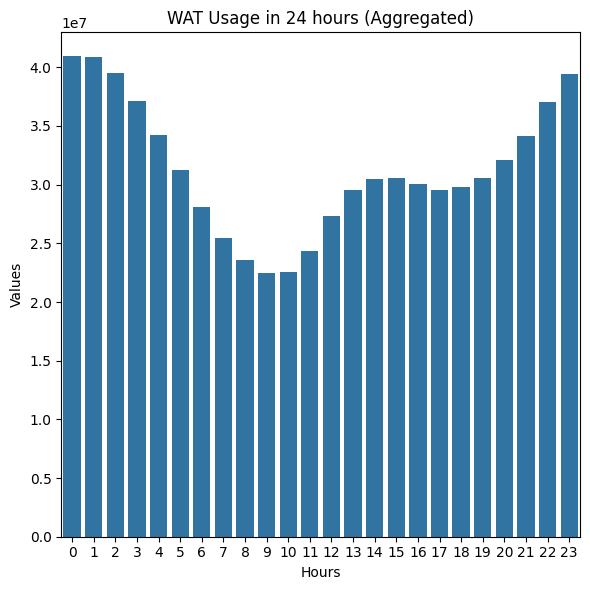

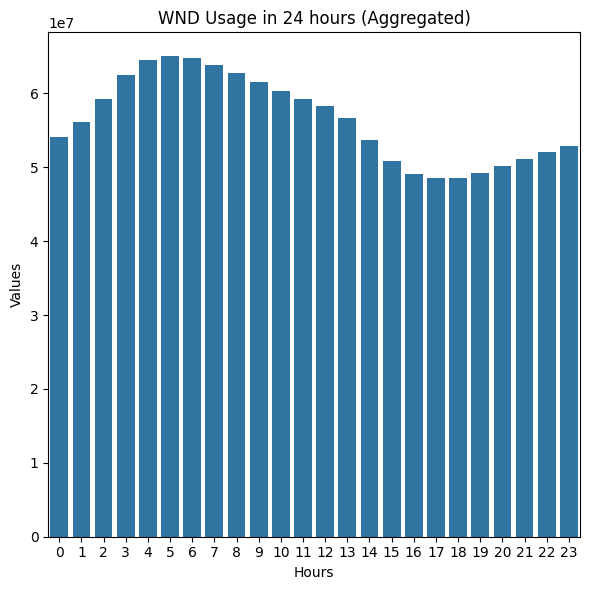

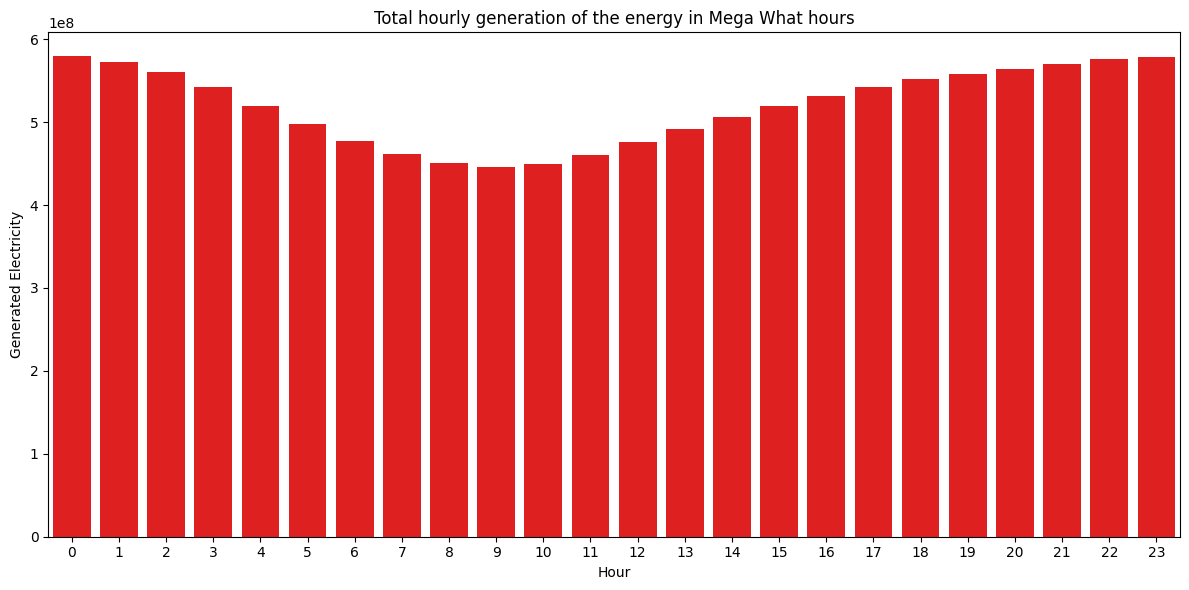

In [ ]:
### Hourly analysis of the data 

# getting the overall statistics
print(data_table.describe())

stats = {}

for col in data_table.columns:
    stats[col] = {
        "mean": data_table[col].mean(),
        "median": data_table[col].median()
    }
stats_df = pd.DataFrame.from_dict(stats, orient='index')

# creating a long form table to efficiently display fuel usage by hour
data_table_long = data_table.reset_index()
df_long = data_table_long.melt(id_vars='hour', var_name='fueltype', value_name='value')

# visualazing the data
plt.figure(figsize=(20,12))
sns.barplot(data=df_long, x='hour', y='value', hue='fueltype')
plt.title("Hourly Energy Usage by fuel type")
plt.xlabel("Hours")
plt.ylabel("Values")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

#checking the energy source usage one by one to get a deeper understanding of the issue

for col in data_table.columns:
    plt.figure(figsize=(6,6))
    sns.barplot(data=df_long[df_long['fueltype'] == col], x='hour', y='value')
    plt.title(f"{col} Usage in 24 hours (Aggregated)")
    plt.xlabel("Hours")
    plt.ylabel("Values")
    plt.tight_layout()
    plt.show()

#visualizing the total hourly generation of the data
plt.figure(figsize=(12,6))
sns.barplot(data=total_hourly_generation, x='hour', y='total_generation_for_hour', color='red')
plt.title(f"Total hourly generation of the energy in Mega What hours")
plt.xlabel("Hour")
plt.ylabel("Generated Electricity")
plt.tight_layout()
plt.show()

In [17]:
df_long.head()

,hour,fueltype,value
0,0,BAT,366618.0
1,1,BAT,319446.0
2,2,BAT,205896.0
3,3,BAT,170112.0
4,4,BAT,131025.0


In [18]:
stats_df

,mean,median
BAT,8.801125e+04,3.890850e+04
COL,8.397289e+07,8.439181e+07
GEO,1.752500e+02,2.070000e+02
NG,2.167361e+08,2.117583e+08
NUC,9.759211e+07,9.755618e+07
OIL,7.705402e+05,7.773712e+05
OTH,7.593129e+06,7.115373e+06
PS,3.691175e+04,2.978400e+04
SNB,7.685000e+02,5.400000e+02
SUN,2.566874e+07,1.488844e+07


In [21]:
### this one groups the data in a weekly period
energy_df["weekly_period"] = energy_df['period'].dt.to_period("W")
### this categorizes weekly data in week days
energy_df["day_of_week"] = energy_df['period'].dt.day_of_week
energy_df

,period,respondent,respondent-name,fueltype,type-name,value,value-units,hour,weekly_period,day_of_week
0,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,2162.0,megawatthours,0,2024-01-01/2024-01-07,0
1,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",NG,Natural Gas,984.0,megawatthours,0,2024-01-01/2024-01-07,0
2,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",WND,Wind,244.0,megawatthours,0,2024-01-01/2024-01-07,0
3,2024-01-01,AVA,Avista Corporation,NG,Natural Gas,378.0,megawatthours,0,2024-01-01/2024-01-07,0
4,2024-01-01,AVA,Avista Corporation,OTH,Other,129.0,megawatthours,0,2024-01-01/2024-01-07,0
...,...,...,...,...,...,...,...,...,...,...
3427509,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WAT,Hydro,0.0,megawatthours,0,2024-12-30/2025-01-05,1
3427510,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WND,Wind,81.0,megawatthours,0,2024-12-30/2025-01-05,1
3427511,2024-12-31,WAUW,Western Area Power Administration - Upper Grea...,WAT,Hydro,69.0,megawatthours,0,2024-12-30/2025-01-05,1
3427512,2024-12-31,WWA,"NaturEner Wind Watch, LLC",WND,Wind,0.0,megawatthours,0,2024-12-30/2025-01-05,1


In [23]:
### analyzing the weekly data 1. by week, 2. by day
data_weekly = energy_df.groupby(["weekly_period", "fueltype"])["value"].sum()
data_table_weekly = data_weekly.unstack(fill_value=0)
data_weekly_day = energy_df.groupby(["day_of_week", "fueltype"])["value"].sum()
data_table_weekly_day = data_weekly_day.unstack(fill_value=0)
data_table_weekly

fueltype,BAT,COL,GEO,NG,NUC,OIL,OTH,PS,SNB,SUN,UES,UNK,WAT,WND
weekly_period,,,,,,,,,,,,,,
2024-01-01/2024-01-07,0.0,4.741285e+07,0.0,1.017388e+08,4.715129e+07,196416.458946,4.784433e+06,0.0,0.0,5.694410e+06,0.0,0.0,1.375958e+07,1.858509e+07
2024-01-08/2024-01-14,0.0,4.881841e+07,0.0,9.060388e+07,4.731466e+07,204411.000000,4.657202e+06,0.0,0.0,5.852739e+06,0.0,0.0,1.476832e+07,3.679459e+07
2024-01-15/2024-01-21,0.0,6.629304e+07,0.0,1.129310e+08,4.763904e+07,744736.458946,5.599820e+06,0.0,0.0,6.404933e+06,0.0,0.0,1.598756e+07,2.733310e+07
2024-01-22/2024-01-28,0.0,4.908830e+07,0.0,1.003136e+08,4.665371e+07,244509.000000,4.568670e+06,0.0,0.0,5.200908e+06,0.0,0.0,1.423379e+07,1.394437e+07
2024-01-29/2024-02-04,0.0,3.852685e+07,0.0,8.844654e+07,4.695742e+07,225210.000000,4.502068e+06,0.0,0.0,7.574495e+06,0.0,0.0,1.606844e+07,2.479865e+07
2024-02-05/2024-02-11,0.0,3.475122e+07,0.0,8.692360e+07,4.817728e+07,190233.000000,2.939891e+06,0.0,0.0,7.021267e+06,0.0,0.0,1.525645e+07,2.877883e+07
2024-02-12/2024-02-18,0.0,3.560493e+07,0.0,9.461306e+07,4.659316e+07,151581.000000,2.946540e+06,0.0,0.0,8.765060e+06,0.0,0.0,1.594788e+07,2.572384e+07
2024-02-19/2024-02-25,0.0,3.179750e+07,0.0,8.701954e+07,4.614848e+07,219262.835783,3.184879e+06,0.0,0.0,1.037818e+07,0.0,0.0,1.511586e+07,2.847871e+07
2024-02-26/2024-03-03,0.0,2.718580e+07,0.0,8.230335e+07,4.533981e+07,204468.000000,2.835047e+06,0.0,0.0,8.701358e+06,0.0,0.0,1.528611e+07,3.773597e+07


In [24]:
data_table_weekly_day

fueltype,BAT,COL,GEO,NG,NUC,OIL,OTH,PS,SNB,SUN,UES,UNK,WAT,WND
day_of_week,,,,,,,,,,,,,,
0,316761.0,2.919363e+08,2526.0,7.531952e+08,3.397236e+08,2.854331e+06,2.681262e+07,136341.0,2871.0,8.827937e+07,-334836.0,0.0,1.091955e+08,2.014266e+08
1,287088.0,2.933332e+08,105.0,7.625720e+08,3.336782e+08,3.138920e+06,2.644415e+07,140355.0,1935.0,8.915680e+07,-268698.0,0.0,1.088793e+08,1.954157e+08
2,270429.0,2.970481e+08,0.0,7.689369e+08,3.338270e+08,3.435147e+06,2.618049e+07,117807.0,2964.0,8.776728e+07,-274044.0,0.0,1.093987e+08,1.880333e+08
3,318834.0,2.960062e+08,0.0,7.648833e+08,3.342663e+08,2.971373e+06,2.654919e+07,134259.0,2640.0,8.826641e+07,-304728.0,0.0,1.096269e+08,1.862975e+08
4,306408.0,2.908303e+08,0.0,7.518586e+08,3.350147e+08,2.371633e+06,2.630809e+07,136065.0,3147.0,8.757323e+07,-300276.0,0.0,1.107619e+08,1.939857e+08
5,294540.0,2.760349e+08,0.0,7.114429e+08,3.329876e+08,1.799662e+06,2.517298e+07,119154.0,2331.0,8.806105e+07,-283449.0,0.0,1.035742e+08,1.927786e+08
6,318210.0,2.701605e+08,1575.0,6.887780e+08,3.327132e+08,1.921899e+06,2.476759e+07,101901.0,2556.0,8.694565e+07,-304458.0,0.0,9.973370e+07,1.972054e+08


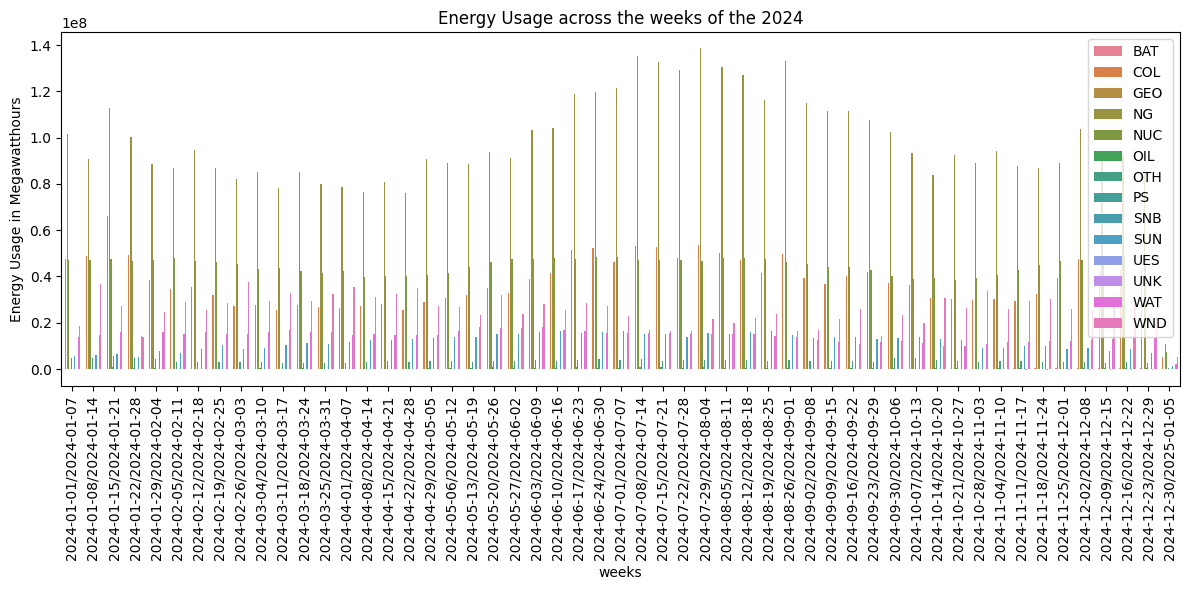

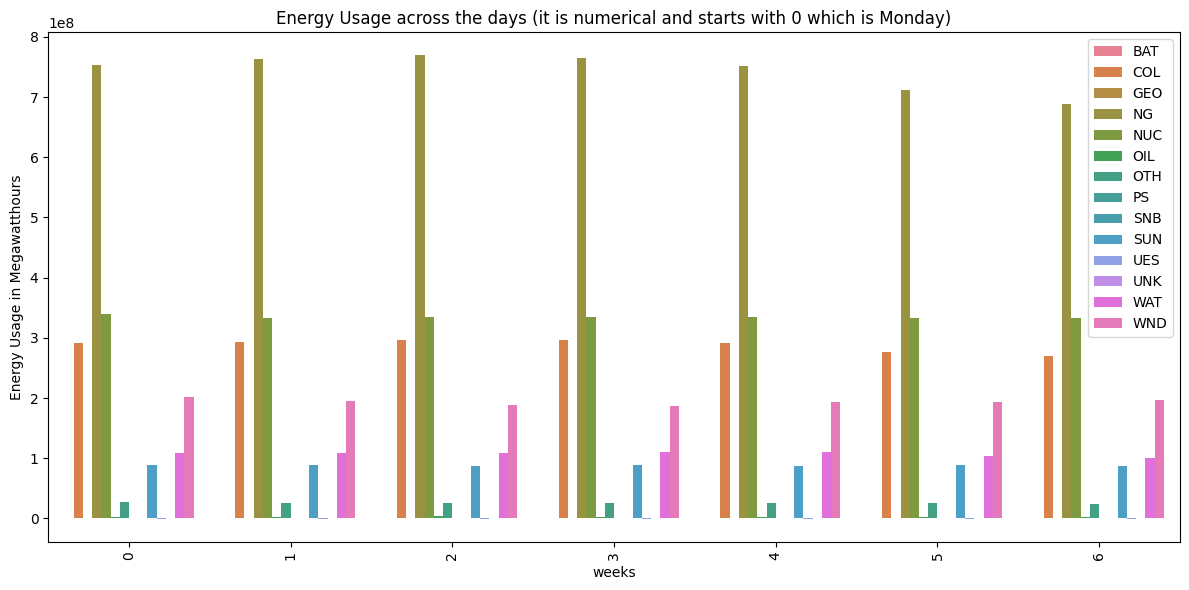

In [ ]:
## Visualizing the data for the analysis
#preparing data for visualization
data_table_long = data_table_weekly.reset_index()
df_long = data_table_long.melt(id_vars='weekly_period', var_name='fueltype', value_name='value')

#plotting the results
plt.figure(figsize=(12,6))
sns.barplot(data=df_long, x="weekly_period", y="value", hue="fueltype")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Energy Usage across the weeks of the 2024")
plt.xlabel("weeks")
plt.ylabel("Energy Usage in Megawatthours")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

data_table_long_day = data_table_weekly_day.reset_index()
df_long = data_table_long_day.melt(id_vars='day_of_week', var_name='fueltype', value_name='value')

#plotting the results
plt.figure(figsize=(12,6))
sns.barplot(data=df_long, x="day_of_week", y="value", hue="fueltype")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Energy Usage across the days (it is numerical and starts with 0 which is Monday)")
plt.xlabel("days")
plt.ylabel("Energy Usage in Megawatthours")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [38]:
## final aggregation and visualizing the data is for the daily aggregation of the whole year which should be 365 distinct datapoints.
energy_df['date'] = energy_df['period'].dt.date
data_daily = energy_df.groupby(["date", "fueltype"])["value"].sum()
data_table_daily = data_daily.unstack(fill_value=0)
data_table_daily

fueltype,BAT,COL,GEO,NG,NUC,OIL,OTH,PS,SNB,SUN,UES,UNK,WAT,WND
date,,,,,,,,,,,,,,
2024-01-01,0.0,5.937012e+06,0.0,1.327246e+07,6769758.0,43947.458946,655603.458946,0.0,0.0,8.479775e+05,0.0,0.0,1966134.0,2139579.0
2024-01-02,0.0,6.331994e+06,0.0,1.429763e+07,6711537.0,22335.000000,674284.000000,0.0,0.0,8.948730e+05,0.0,0.0,2079267.0,3085563.0
2024-01-03,0.0,7.372363e+06,0.0,1.619941e+07,6676737.0,34233.000000,726394.000000,0.0,0.0,7.005040e+05,0.0,0.0,2182830.0,1720614.0
2024-01-04,0.0,6.889068e+06,0.0,1.541530e+07,6658794.0,29259.000000,677934.000000,0.0,0.0,8.054370e+05,0.0,0.0,1990905.0,2677668.0
2024-01-05,0.0,7.330921e+06,0.0,1.505088e+07,6719844.0,23292.000000,723541.000000,0.0,0.0,9.050400e+05,0.0,0.0,2090340.0,3141600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,44775.0,5.978436e+06,0.0,1.256377e+07,7052742.0,57450.000000,420327.000000,19026.0,471.0,9.290770e+05,-42282.0,0.0,1985664.0,3665127.0
2024-12-28,35049.0,5.504171e+06,0.0,1.145568e+07,6957693.0,23208.000000,378384.000000,2610.0,432.0,8.860370e+05,-42015.0,0.0,1872519.0,3847197.0
2024-12-29,36024.0,5.056137e+06,1575.0,1.106857e+07,6975747.0,21549.000000,347180.000000,0.0,408.0,1.071724e+06,-37932.0,0.0,1846662.0,3160995.0


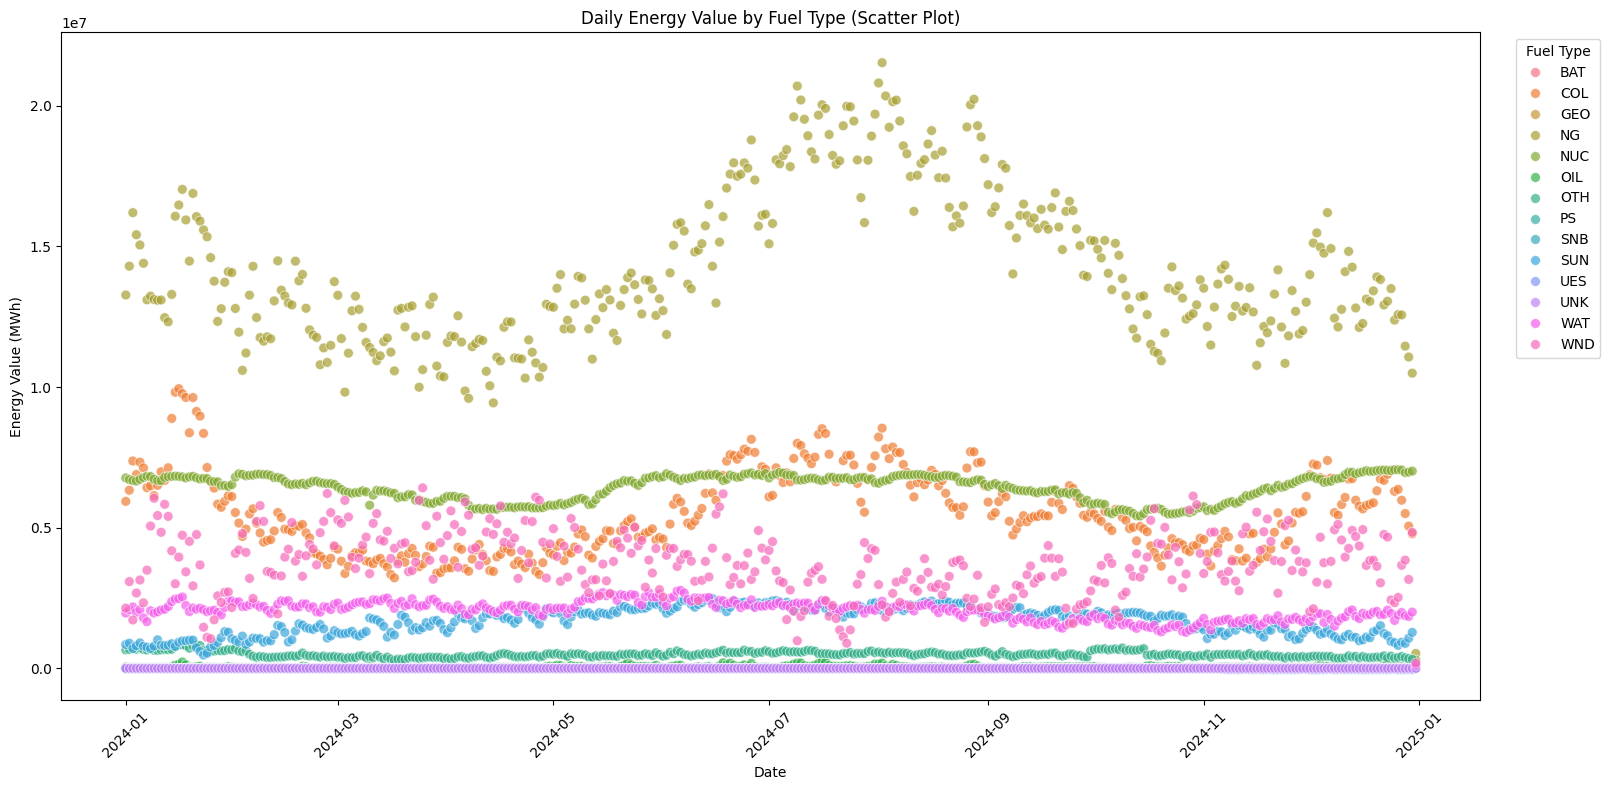

In [ ]:
## visualizing the daily aggregated data
data_table_long = data_table_daily.reset_index()
df_long = data_table_long.melt(id_vars='date', var_name='fueltype', value_name='value')
#filtering out fuels that generate 0 electricity
df_long = df_long[df_long['value'] > 0]
plt.figure(figsize=(18, 8))
sns.scatterplot(data=df_long, x='date', y='value', hue='fueltype', alpha=0.7, s=50)
plt.title('Daily Energy Value by Fuel Type (Scatter Plot)')
plt.xlabel('Date')
plt.ylabel('Energy Value in Megawatthours')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()